# Capstone Project: Building a Simple Math Chatbot (Part 1)

In Part 1, we extract data, process it and clean it.

## Contents
1. [Import Libraries](#Import-Libraries)
2. [Renaming Files](#Renaming-Files)
3. [Data Extraction](#Data-Extraction)
4. [Data Cleaning](#Data-Cleaning)
5. [Feature Creation Using OpenAI](#Feature-Creation-Using-OpenAI)
6. [EDA](#EDA)
7. [Export](#Export)

## Import Libraries

In [3]:
# File and System Operations
import csv
import os

# Regular Expressions
import re

# Image Processing
from PIL import Image
import pytesseract

# Data Analysis and Visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Progress Bar
from tqdm import tqdm

# Local or Specialized Libraries
from openai import OpenAI
import openai

# PDF Generation & Processing
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, PageBreak
from reportlab.lib.styles import getSampleStyleSheet
import pandas as pd

# Load Environment Variables
from dotenv import load_dotenv, find_dotenv

## Renaming Files

In [69]:
def rename_images(folder_path, base_filename):
    # Get a list of files in the folder
    files = os.listdir(folder_path)

    # Filter out the .DS_Store file
    files = [f for f in files if f != '.DS_Store' and (f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg'))]

    # Sort files
    files.sort()

    # Iterate over files and rename them
    for i, filename in enumerate(files):
        # Construct the new file name
        new_name = f"{base_filename}_{i+1}.png"
        
        # Construct full file paths
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_name)
        
        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed {filename} to {new_name}")

folder_path = '../images'  # Replace with your folder path
base_filename = 'image'            # Replace with your desired base filename
rename_images(folder_path, base_filename)


Renamed image_1.png to image_1.png
Renamed image_10.png to image_2.png
Renamed image_11.png to image_3.png
Renamed image_12.png to image_4.png
Renamed image_13.png to image_5.png
Renamed image_14.png to image_6.png
Renamed image_15.png to image_7.png
Renamed image_16.png to image_8.png
Renamed image_17.png to image_9.png
Renamed image_18.png to image_10.png
Renamed image_19.png to image_11.png
Renamed image_20.png to image_12.png
Renamed image_21.png to image_13.png
Renamed image_22.png to image_14.png
Renamed image_23.png to image_15.png
Renamed image_24.png to image_16.png
Renamed image_25.png to image_17.png
Renamed image_26.png to image_18.png
Renamed image_27.png to image_19.png
Renamed image_28.png to image_20.png
Renamed image_29.png to image_21.png
Renamed image_30.png to image_22.png
Renamed image_31.png to image_23.png
Renamed image_32.png to image_24.png
Renamed image_33.png to image_25.png
Renamed image_34.png to image_26.png
Renamed image_35.png to image_27.png
Renamed ima

## Data Extraction

Use Pytesseract to extract text from image files. The image files are screenshots from a collection of exam papers.

In [70]:
def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

image_directory = '../images'

with open('../datasets/raw_text.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Image', 'Question'])

    # Process each image in the directory
    for image_name in os.listdir(image_directory):
        if image_name.endswith('.png'):
            image_path = os.path.join(image_directory, image_name)
            extracted_text = extract_text_from_image(image_path)
            writer.writerow([image_name, extracted_text])

print("Text extraction complete. Data written to raw_text.csv.")


Text extraction complete. Data written to raw_text.csv.


## Data Cleaning

For the data cleaning process, it will be a hybrid approach. Most of the data will be cleaned using code and the remainder will be done manually.

In [71]:
df = pd.read_csv("../datasets/raw_text.csv")

# Extract numbers from the image names
df['Image_Number'] = df['Image'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# Sort by the extracted number and reset the index
df = df.sort_values('Image_Number').reset_index(drop=True)

# Drop the 'Image_Number' column
df.drop('Image_Number', axis=1, inplace=True)

In [72]:
pd.set_option('display.max_colwidth', None) 
df.head(10)

,Image,Question
0,image_1.png,Find the remainder of 3908 divided by 7.\n\n(1) 2 (3) 5\n(2) 3 (4) 6\n
1,image_2.png,Round off 87.948 to 2 decimal places.\n\n(1) 87.90 (3) 87.95\n(2) 87.94 (4) 88.00\n
2,image_3.png,What is 26.05 kg in kilograms and grams?\n\n(1) 2kg 605g (2) 26kg 5g\n(3) 26 kg 50g (4) 26 kg 500g\n
3,image_4.png,Find the product of 35 and 208.\n\n(1) 173 (3) 7280\n(2) 243 (4) 7820\n
4,image_5.png,Express 1.8% as a decimal.\n\n(1) 0.0018 (2) 0.018\n(3) 0.18 (4) 18\n
5,image_6.png,Round off 3.836 to the nearest hundredth.\n\n(I) 3.8 (2) 3.83\n(3) 3.84 (4) 3.90\n
6,image_7.png,Ali and John have 144 stamps altogether. Ali has 4 more stamps than John. How\nmany stamps does Ali have?\n\n(1) 68\n(2) 70\n(3) 74\n\n(4) 76\n
7,image_8.png,What is 80% of 160?\n(i) 32 (2) 72\n(3) 128 (4) 12 800\n
8,image_9.png,"What is five million, nine thousand and sixty in numerals?\n(1) 5 009 006\n(2) 5 009 060\n(3) 5090 006\n(4) 5090 060\n"
9,image_10.png,Find the product of 87 and 4065.\n\n(1) 3978 (3) 353 655\n(2) 4152 (4) 363 555\n


In [73]:
def clean_text(text):
    # Remove newlines and extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove unwanted characters
    text = re.sub(r'[{}«]', '', text)
    
    # Replace multiple periods not followed by a digit with a single period
    text = re.sub(r'\.(?!\d)', '. ', text)
    
    return text.strip()  # Remove leading/trailing whitespace

# Apply the cleaning function to the 'Question' column
df['Question'] = df['Question'].apply(clean_text)

In [74]:
df.head(10)

,Image,Question
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (3) 5 (2) 3 (4) 6
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (3) 87.95 (2) 87.94 (4) 88.00
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g
3,image_4.png,Find the product of 35 and 208. (1) 173 (3) 7280 (2) 243 (4) 7820
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18
5,image_6.png,Round off 3.836 to the nearest hundredth. (I) 3.8 (2) 3.83 (3) 3.84 (4) 3.90
6,image_7.png,Ali and John have 144 stamps altogether. Ali has 4 more stamps than John. How many stamps does Ali have? (1) 68 (2) 70 (3) 74 (4) 76
7,image_8.png,What is 80% of 160? (i) 32 (2) 72 (3) 128 (4) 12 800
8,image_9.png,"What is five million, nine thousand and sixty in numerals? (1) 5 009 006 (2) 5 009 060 (3) 5090 006 (4) 5090 060"
9,image_10.png,Find the product of 87 and 4065. (1) 3978 (3) 353 655 (2) 4152 (4) 363 555


In [75]:
# Define a function to reorder the options
def reorder_options(question):
    # Find all option patterns
    options = re.findall(r'\(\d+\) [^\(\)]+', question)
    
    # Sort options based on the number within parentheses
    sorted_options = sorted(options, key=lambda x: int(re.search(r'\((\d+)\)', x).group(1)))
    
    # Replace the original options string with the sorted options
    sorted_question = re.sub(r'\(\d+\) [^\(\)]+', '{}', question).format(*sorted_options)
    
    return sorted_question

# Apply the function to the 'Question' column
df['Question'] = df['Question'].apply(reorder_options)

In [76]:
df.head(10)

,Image,Question
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18
5,image_6.png,Round off 3.836 to the nearest hundredth. (I) 3.8 (2) 3.83 (3) 3.84 (4) 3.90
6,image_7.png,Ali and John have 144 stamps altogether. Ali has 4 more stamps than John. How many stamps does Ali have? (1) 68 (2) 70 (3) 74 (4) 76
7,image_8.png,What is 80% of 160? (i) 32 (2) 72 (3) 128 (4) 12 800
8,image_9.png,"What is five million, nine thousand and sixty in numerals? (1) 5 009 006 (2) 5 009 060 (3) 5090 006 (4) 5090 060"
9,image_10.png,Find the product of 87 and 4065. (1) 3978 (2) 4152 (3) 353 655 (4) 363 555


In [77]:
# Replace incorrect (1) variations with the correct one
df['Question'] = df['Question'].str.replace(r'\(l\)', '(1)', regex=True)
df['Question'] = df['Question'].str.replace(r'\(i\)', '(1)', regex=True)
df['Question'] = df['Question'].str.replace(r'\(I\)', '(1)', regex=True)

In [79]:
df.head(30)

,Image,Question
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18
5,image_6.png,Round off 3.836 to the nearest hundredth. (1) 3.8 (2) 3.83 (3) 3.84 (4) 3.90
6,image_7.png,Ali and John have 144 stamps altogether. Ali has 4 more stamps than John. How many stamps does Ali have? (1) 68 (2) 70 (3) 74 (4) 76
7,image_8.png,What is 80% of 160? (1) 32 (2) 72 (3) 128 (4) 12 800
8,image_9.png,"What is five million, nine thousand and sixty in numerals? (1) 5 009 006 (2) 5 009 060 (3) 5090 006 (4) 5090 060"
9,image_10.png,Find the product of 87 and 4065. (1) 3978 (2) 4152 (3) 353 655 (4) 363 555


In [81]:
df.to_csv('../datasets/for_review.csv', index=False)

There are still some errors which will be fixed manually. The file will be saved as reviewed.csv.

In [99]:
df = pd.read_csv('../datasets/reviewed.csv')
df.head(30)

,Image,Question
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18
5,image_6.png,Round off 3.836 to the nearest hundredth. (1) 3.8 (2) 3.83 (3) 3.84 (4) 3.90
6,image_7.png,Ali and John have 144 stamps altogether. Ali has 4 more stamps than John. How many stamps does Ali have? (1) 68 (2) 70 (3) 74 (4) 76
7,image_8.png,What is 80% of 160? (1) 32 (2) 72 (3) 128 (4) 12 800
8,image_9.png,"What is five million, nine thousand and sixty in numerals? (1) 5 009 006 (2) 5 009 060 (3) 5090 006 (4) 5090 060"
9,image_10.png,Find the product of 87 and 4065. (1) 3978 (2) 4152 (3) 353 655 (4) 363 555


## Feature Creation Using OpenAI

In [5]:
tqdm.pandas()

_ = load_dotenv(find_dotenv()) # read local .env file
openai.api_key = os.environ['OPENAI_API_KEY']

GPT_MODEL = "gpt-4"

def get_data(question):

    prompt = (
        "You are an AI capable of solving math problems. "
        "For each problem, select the best answer from the given multiple-choice options. "
        "Explain why this choice is correct and why the others are not. "
        "Your explanations should be clear and concise, using simple arithmetic and intuitive reasoning when possible. "
        f"Here is the problem: {question}\n\n"
        "Best Answer and Explanation: \n\n"
    )

    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": question}
    ]

    response = openai.chat.completions.create(
        model=GPT_MODEL,
        messages=messages,
        temperature=0 
    )

    response_message = response.choices[0].message.content

    return response_message

file_path = '../datasets/reviewed.csv'
df = pd.read_csv(file_path, encoding='iso-8859-1')
df['Solution'] = df['Question'].progress_apply(get_data)

  0%|          | 0/80 [00:00<?, ?it/s]

100%|██████████| 80/80 [19:24<00:00, 14.55s/it]


In [104]:
df.head()

,Image,Question,Solution
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder."
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much."
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely."
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820."
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%."


In [103]:
df.to_csv('../datasets/data.csv', index=False)

In [115]:
def classify_question(question):
    """
    Classify a math question using the OpenAI API into AO1, AO2, or AO3.
    """
    prompt = (
        "Here are the classifications:\n"
        "AO1: Recall mathematical facts, concepts, rules, and formulae; perform straightforward computations and algebraic procedures.\n"
        "AO2: Interpret information; understand and apply mathematical concepts and skills in a variety of contexts.\n"
        "AO3: Reason mathematically; analyze information and make inferences; select appropriate strategies to solve problems.\n\n"
        f"Classify the following math question into AO1, AO2, or AO3:\n\nQuestion: {question}\n\nClassification:"
    )

    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": question}
    ]
    response = openai.chat.completions.create(
        model=GPT_MODEL,
        messages=messages,
        temperature=0 )
    
    response_message = response.choices[0].message.content
    return response_message

# Example usage with DataFrame
file_path = "../datasets/data.csv"  
df = pd.read_csv(file_path)

# Apply the classify_question function to each row in the DataFrame
df['Level'] = df['Question'].progress_apply(classify_question)


100%|██████████| 80/80 [01:27<00:00,  1.09s/it]


In [119]:
df.head()

,Image,Question,Solution,Level
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder.",Classification: AO1
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much.",Classification: AO1
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely.",Classification: AO1
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820.",Classification: AO1
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%.",Classification: AO1


In [120]:
def extract_class(classification):
    match = re.search(r'AO[123]', classification)
    if match:
        return match.group()
    else:
        return None

df['Level'] = df['Level'].apply(extract_class)

In [121]:
df.head()

,Image,Question,Solution,Level
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder.",AO1
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much.",AO1
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely.",AO1
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820.",AO1
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%.",AO1


In [122]:
df.to_csv('../datasets/data.csv', index=False)

In [123]:
def topic(question):
    """
    Classify a math question using the OpenAI API into the relevant topic.
    """
    prompt = (
        "Here are the topics:\n"
        "Numbers, Measurement, Statistics, Geometry, Ratio & Percentage, Rate & Speed, Algebra"
        f"Classify the following math question into one of the relevant topics:\n\nQuestion: {question}\n\nTopic:"
    )

    messages = [
        {"role": "system", "content": prompt},
        {"role": "user", "content": question}
    ]
    response = openai.chat.completions.create(
        model=GPT_MODEL,
        messages=messages,
        temperature=0 )
    
    response_message = response.choices[0].message.content
    return response_message

# Example usage with DataFrame
file_path = "../datasets/data.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Apply the classify_question function to each row in the DataFrame
df['Topic'] = df['Question'].progress_apply(topic)


100%|██████████| 80/80 [11:25<00:00,  8.57s/it]   


In [124]:
df.to_csv('../datasets/data.csv', index=False)

In [125]:
df.head()

,Image,Question,Solution,Level,Topic
0,image_1.png,Find the remainder of 3908 divided by 7. (1) 2 (2) 3 (3) 5 (4) 6,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder.",AO1,Numbers
1,image_2.png,Round off 87.948 to 2 decimal places. (1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much.",AO1,Numbers
2,image_3.png,What is 26.05 kg in kilograms and grams? (1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely.",AO1,Measurement
3,image_4.png,Find the product of 35 and 208. (1) 173 (2) 243 (3) 7280 (4) 7820,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820.",AO1,Numbers
4,image_5.png,Express 1.8% as a decimal. (1) 0.0018 (2) 0.018 (3) 0.18 (4) 18,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%.",AO1,Ratio & Percentage


In [126]:
# Check that the topics are correctly assigned
df['Topic'].value_counts()

Topic
Numbers                      39
Measurement                  10
Algebra                       8
Ratio & Percentage            6
Geometry                      6
Topic: Numbers                4
Rate & Speed                  3
Topic: Ratio & Percentage     1
Rate & Speed)                 1
Topic: Algebra                1
Statistics                    1
Name: count, dtype: int64

In [129]:
df['Topic'] = df['Topic'].str.replace('Topic: Numbers', 'Numbers')
df['Topic'] = df['Topic'].str.replace('Rate & Speed)', 'Rate & Speed')
df['Topic'] = df['Topic'].str.replace('Topic: Algebra', 'Algebra')
df['Topic'] = df['Topic'].str.replace('Topic: Ratio & Percentage', 'Ratio & Percentage')


In [130]:
df['Topic'].value_counts()

Topic
Numbers               43
Measurement           10
Algebra                9
Ratio & Percentage     7
Geometry               6
Rate & Speed           4
Statistics             1
Name: count, dtype: int64

In [158]:
# Function to separate question and options
def separate_question_options(text):
    split_text = text.split('(')
    question = split_text[0].strip()
    options = '(' + '('.join(split_text[1:])
    return question, options

# Apply the function to each row in the DataFrame
df[['Question_Text', 'Options']] = df.apply(lambda row: pd.Series(separate_question_options(row['Question'])), axis=1)
df.drop(columns=['Image','Question'],inplace=True)
df.rename(columns={'Question_Text': 'Question'}, inplace=True)

In [159]:
df.head()

,Solution,Level,Topic,Question,Options
0,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder.",AO1,Numbers,Find the remainder of 3908 divided by 7.,(1) 2 (2) 3 (3) 5 (4) 6
1,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much.",AO1,Numbers,Round off 87.948 to 2 decimal places.,(1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00
2,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely.",AO1,Measurement,What is 26.05 kg in kilograms and grams?,(1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g
3,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820.",AO1,Numbers,Find the product of 35 and 208.,(1) 173 (2) 243 (3) 7280 (4) 7820
4,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%.",AO1,Ratio & Percentage,Express 1.8% as a decimal.,(1) 0.0018 (2) 0.018 (3) 0.18 (4) 18


In [160]:
df = df[['Question', 'Options', 'Solution','Topic','Level']]

In [161]:
df.head()

,Question,Options,Solution,Topic,Level
0,Find the remainder of 3908 divided by 7.,(1) 2 (2) 3 (3) 5 (4) 6,"The best answer is (2) 3.\n\nExplanation:\n\nWhen you divide 3908 by 7, you get a quotient of 558 and a remainder of 3. This is because 7*558 = 3906, and 3908 - 3906 = 2, which is the remainder. \n\nThe other options are incorrect because they do not give the correct remainder when 3908 is divided by 7. For example, if the remainder was 2 (option 1), then 7*558 + 2 = 3908, which is not true. Similarly, options 3 and 4 do not give the correct remainder.",Numbers,AO1
1,Round off 87.948 to 2 decimal places.,(1) 87.90 (2) 87.94 (3) 87.95 (4) 88.00,"The best answer is (3) 87.95.\n\nExplanation: When rounding to two decimal places, we look at the third decimal place. If this number is 5 or above, we round up. If it's 4 or below, we round down. In this case, the third decimal place is 8, which is above 5, so we round up. This means 87.948 becomes 87.95. \n\nThe other options are incorrect because they do not follow this rule. For example, 87.90 and 87.94 are both rounding down too much, and 88.00 is rounding up too much.",Numbers,AO1
2,What is 26.05 kg in kilograms and grams?,(1) 2kg 605g (2) 26kg 5g (3) 26 kg 50g (4) 26 kg 500g,"The best answer is (3) 26 kg 50g.\n\nExplanation: \n\nThe number before the decimal point represents the kilograms, so we have 26 kg. The number after the decimal point represents the grams. Since 1 kg equals 1000 grams, 0.05 kg equals 50 grams. Therefore, 26.05 kg is equivalent to 26 kg 50g. \n\nThe other options are incorrect because they do not correctly convert the decimal kilograms to grams. For example, option (2) 26kg 5g incorrectly interprets 0.05 kg as 5 grams, and option (4) 26 kg 500g overestimates the conversion by interpreting 0.05 kg as 500 grams. Option (1) 2kg 605g is incorrect because it misinterprets the kilograms and grams entirely.",Measurement,AO1
3,Find the product of 35 and 208.,(1) 173 (2) 243 (3) 7280 (4) 7820,"The best answer is (3) 7280.\n\nExplanation: \n\nThe product of 35 and 208 is found by multiplying the two numbers together. \n\n35 * 208 = 7280\n\nTherefore, the correct answer is 7280. \n\nThe other options are incorrect because they are not the product of 35 and 208. For example, 35 * 208 is not equal to 173, 243, or 7820.",Numbers,AO1
4,Express 1.8% as a decimal.,(1) 0.0018 (2) 0.018 (3) 0.18 (4) 18,"The best answer is (2) 0.018.\n\nExplanation: \n\nTo convert a percentage to a decimal, you divide the percentage by 100. In this case, 1.8 divided by 100 equals 0.018. \n\nThe other options are incorrect because they do not represent the correct conversion from percentage to decimal. For example, (1) 0.0018 would be the decimal equivalent of 0.18%, not 1.8%. (3) 0.18 would be the decimal equivalent of 18%, not 1.8%. And (4) 18 would be the decimal equivalent of 1800%, not 1.8%.",Ratio & Percentage,AO1


In [162]:
df.to_csv('../datasets/data.csv', index=False)

## EDA

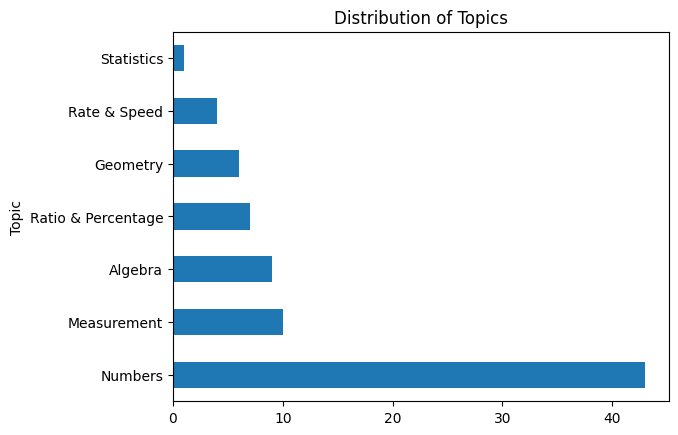

In [154]:
df['Topic'].value_counts().plot(kind="barh")
plt.title('Distribution of Topics')
plt.show()

It is not surprising that of the questions belong to numbers since it is a huge topic in the primary math syllabus.

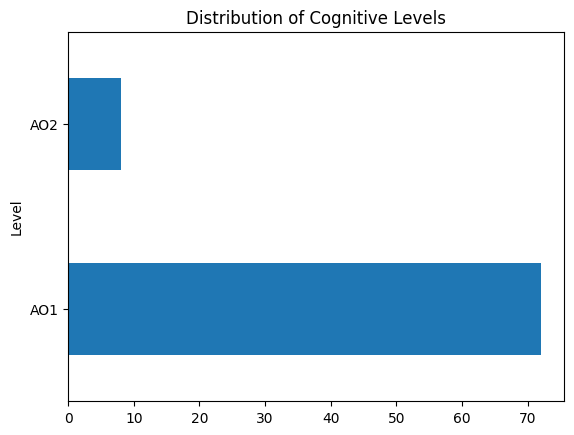

In [155]:
df['Level'].value_counts().plot(kind="barh")
plt.title('Distribution of Cognitive Levels')
plt.show()

It is not suprising that there were no AO3 questions since AO3 type of questions are usually word problems.

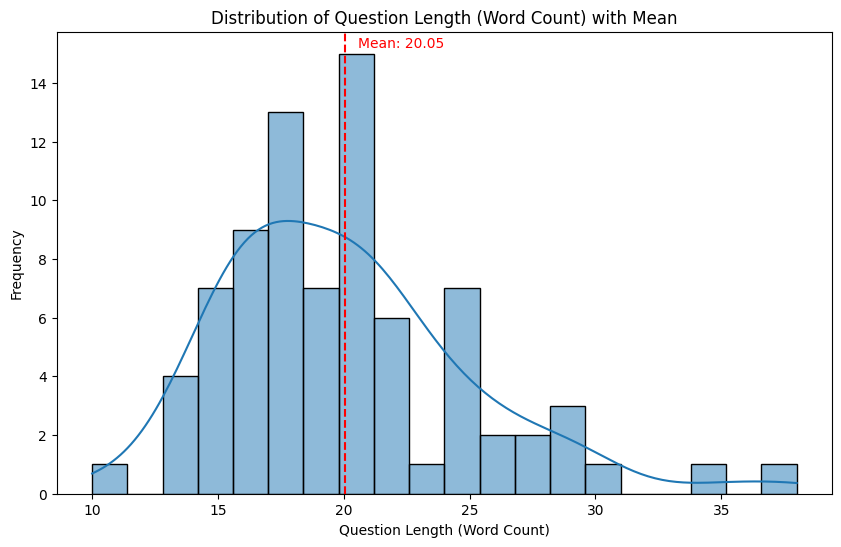

In [151]:
df['Question_Length'] = df['Question'].apply(lambda x: len(x.split()))

mean_length = df['Question_Length'].mean()

# Plot the histogram for Question Length with mean
plt.figure(figsize=(10, 6))
sns.histplot(df['Question_Length'], bins=20, kde=True)
plt.axvline(mean_length, color='r', linestyle='--')
plt.text(mean_length + 0.5, 15.2, f'Mean: {mean_length:.2f}', color='r')
plt.title('Distribution of Question Length (Word Count) with Mean')
plt.xlabel('Question Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

The average number of words in a question is about 20 words.

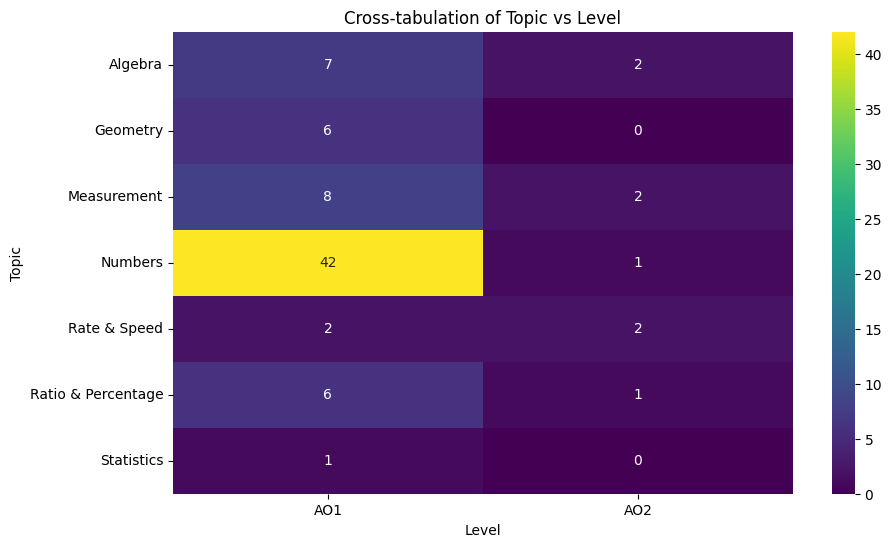

In [152]:
# Creating a cross-tabulation between 'Topic' and 'Level'
topic_level_crosstab = pd.crosstab(df['Topic'], df['Level'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_level_crosstab, annot=True, cmap='viridis', fmt='g')
plt.title('Cross-tabulation of Topic vs Level')
plt.xlabel('Level')
plt.ylabel('Topic')
plt.show()

For this dataset, most of the questions are of AO1 and from the topic of numbers.

## Export

I will be placing each question on a page in a pdf file. This pdf file will be used to create the index for the chatbot later.

In [174]:
styles = getSampleStyleSheet()

# Load the CSV file
file_path = '../datasets/data.csv'
df = pd.read_csv(file_path)

# Create a PDF file
pdf_path = '../streamlit/data/data.pdf'
pdf = SimpleDocTemplate(pdf_path, pagesize=letter)

elements = []

for index, row in df.iterrows():
    # Concatenate the row data into a single paragraph
    row_content = (
        f"<b>Question:</b> {row['Question']},"
        f"<b>Options:</b> {row['Options']},"
        f"<b>Solution:</b> {row['Solution']},"
        f"<b>Difficulty Level:</b> {row['Level']},"
        f"<b>Topic:</b> {row['Topic']}"
    )
    elements.append(Paragraph(row_content, styles['Normal']))
    elements.append(PageBreak())

# Build the PDF
pdf.build(elements)

print("PDF created successfully")



PDF created successfully
